In [1]:
set.seed(1)
my_data <- read.table("data/project2.txt", header = FALSE, sep = ",", stringsAsFactors = FALSE)
head(my_data)

,V1,V2,V3,V4,V5
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,3.62160,8.6661,-2.8073,-0.44699,0
2,4.54590,8.1674,-2.4586,-1.46210,0
3,3.86600,-2.6383,1.9242,0.10645,0
4,3.45660,9.5228,-4.0112,-3.59440,0
5,0.32924,-4.4552,4.5718,-0.98880,0
6,4.36840,9.6718,-3.9606,-3.16250,0


In [2]:
my_data$V5 = as.factor(my_data$V5)

In [3]:
print(paste('Dimestion of the data:', dim(my_data)))

[1] "Dimestion of the data: 1372" "Dimestion of the data: 5"   


### Expolratory Data Analysis

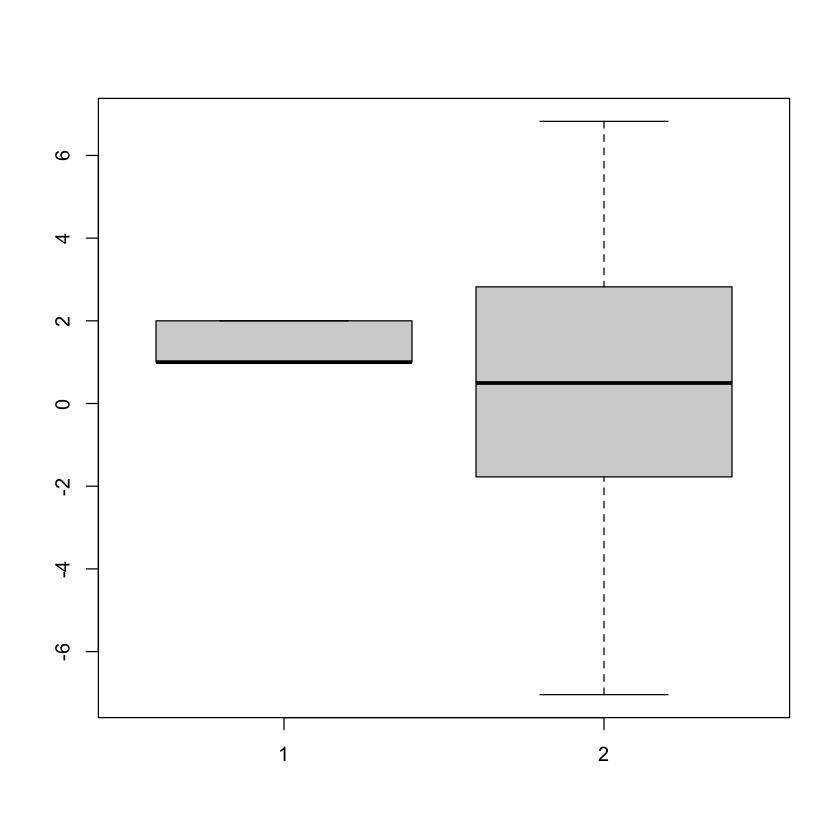

In [71]:
# V5 vs V1
boxplot(my_data$V5, my_data$V1)

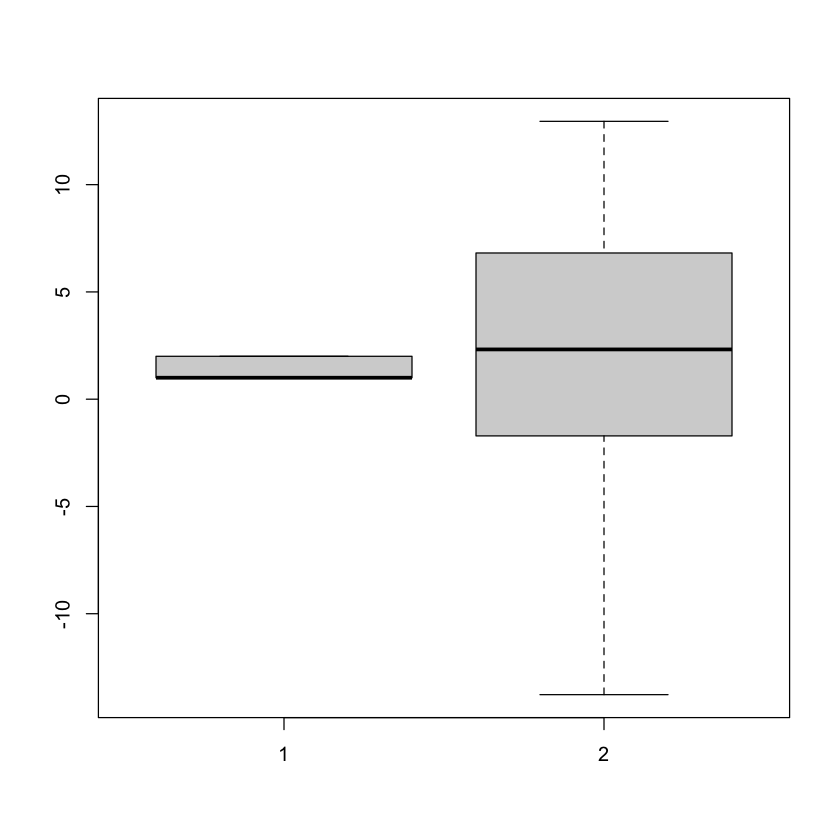

In [72]:
# V5 vs V2
boxplot(my_data$V5, my_data$V2)

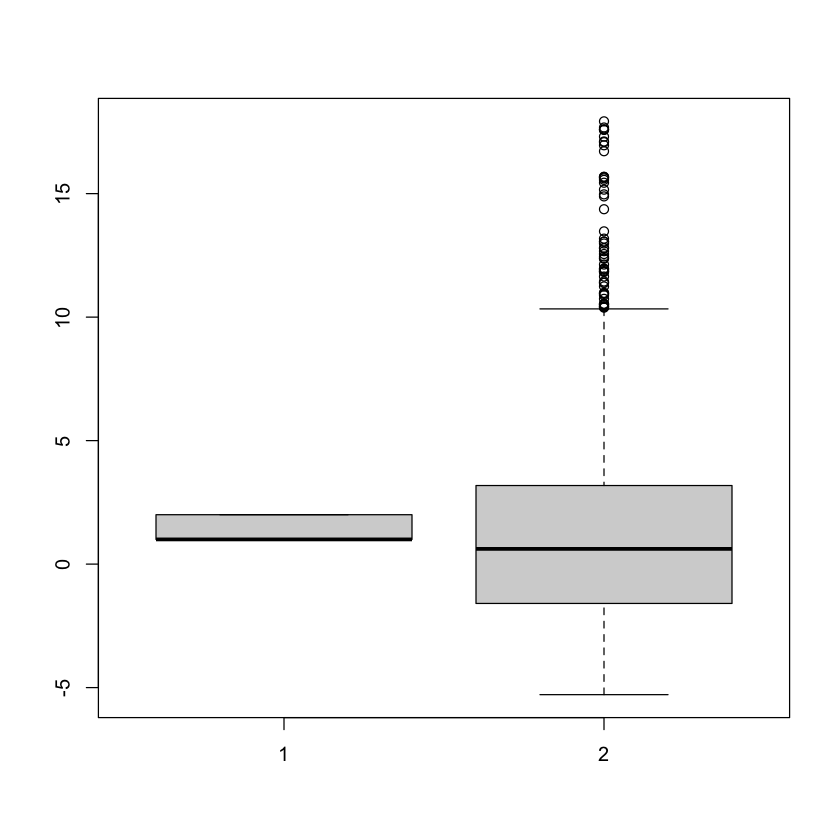

In [73]:
# V5 vs V3
boxplot(my_data$V5, my_data$V3)

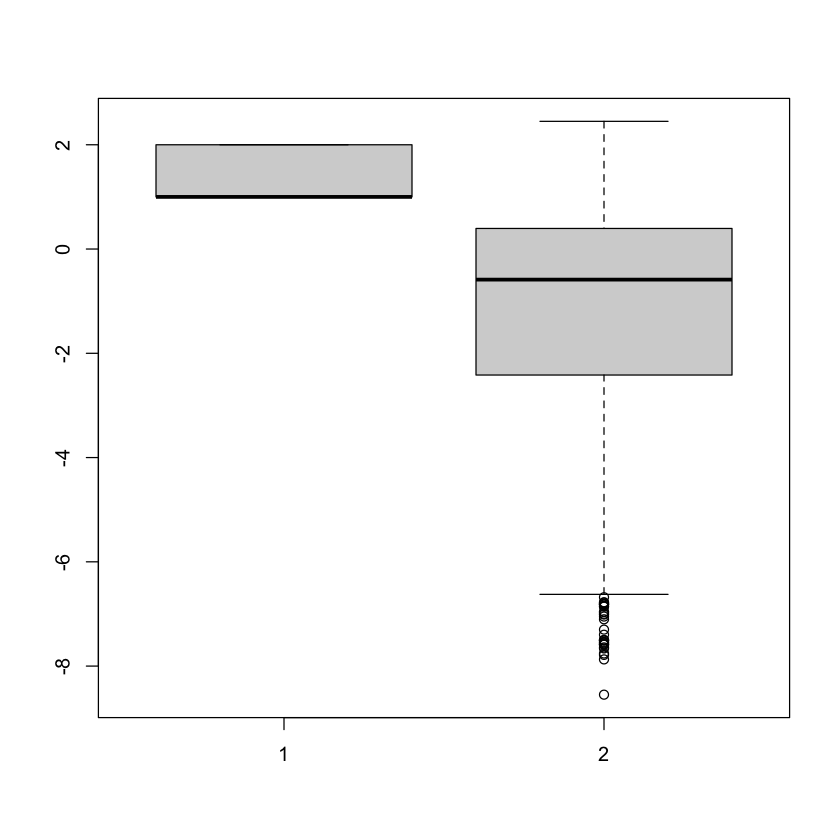

In [74]:
# V5 vs V4
boxplot(my_data$V5, my_data$V4)

### Linear Discriminant Analysis

In [4]:
library(MASS)
library(caret)

Loading required package: ggplot2

Loading required package: lattice



In [5]:
names(my_data)

[1] "V1" "V2" "V3" "V4" "V5"

In [6]:
# Set up the training control object for 5-fold cross-validation
ctrl <- trainControl(method = "cv", number = 5)

# Train the LDA model using 5-fold cross-validation
lda_fit <- train(V5 ~ ., data = my_data, method = "lda", trControl = ctrl)

In [7]:
print(paste("Cross Validated Accuracy:",lda_fit$results$Accuracy))
print(paste("Cross Validated Error:",1-lda_fit$results$Accuracy))

[1] "Cross Validated Accuracy: 0.976684804246848"
[1] "Cross Validated Error: 0.023315195753152"


### Quadrtic Discriminant Analysis

In [8]:
# Set up the training control object for 5-fold cross-validation
ctrl <- trainControl(method = "cv", number = 5)

# Train the QDA model using 5-fold cross-validation
qda_fit <- train(V5 ~ ., data = my_data, method = "qda", trControl = ctrl)

In [9]:
print(paste("Cross Validated Accuracy:",qda_fit$results$Accuracy))
print(paste("Cross Validated Error:",1-qda_fit$results$Accuracy))

[1] "Cross Validated Accuracy: 0.984698075646981"
[1] "Cross Validated Error: 0.0153019243530192"


### Naive Bayes

In [10]:
library(klaR)
# Set up the training control object for 5-fold cross-validation
ctrl <- trainControl(method = "cv", number = 5)

# Train the Naive Bayes model using 5-fold cross-validation
nb_fit <- train(V5 ~ ., data = my_data, method = "nb", trControl = ctrl)

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 96”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 235”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 245”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 240”


In [11]:
print(paste("Cross Validated Accuracy for 0:",nb_fit$results$Accuracy[1]))
print(paste("Cross Validated Accuracy for 1:",nb_fit$results$Accuracy[2]))
print(paste("Cross Validated Error for 0:",1-nb_fit$results$Accuracy[1]))
print(paste("Cross Validated Error for 1:",1-nb_fit$results$Accuracy[2]))

[1] "Cross Validated Accuracy for 0: 0.839633709356337"
[1] "Cross Validated Accuracy for 1: 0.916156602521566"
[1] "Cross Validated Error for 0: 0.160366290643663"
[1] "Cross Validated Error for 1: 0.0838433974784338"


In [12]:
nb_fit$results

,usekernel,fL,adjust,Accuracy,Kappa,AccuracySD,KappaSD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FALSE,0,1,0.8396337,0.6727459,0.03142926,0.06522405
2,TRUE,0,1,0.9161566,0.8290829,0.02243737,0.04628368


### KNN

In [13]:
library(class)

In [14]:
# Set up the training control object for 5-fold cross-validation
ctrl <- trainControl(method = "cv", number = 5)

# Train the KNN model using 5-fold cross-validation
knn_fit <- train(V5 ~ ., data = my_data, method = "knn", trControl = ctrl, tuneLength = 10)

In [15]:
knn_fit

k-Nearest Neighbors 

1372 samples
   4 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1097, 1098, 1097, 1098, 1098 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  1.0000000  1.0000000
   7  1.0000000  1.0000000
   9  1.0000000  1.0000000
  11  1.0000000  1.0000000
  13  1.0000000  1.0000000
  15  0.9970856  0.9941056
  17  0.9934466  0.9867604
  19  0.9927167  0.9852840
  21  0.9927167  0.9852840
  23  0.9927167  0.9852840

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 13.

In [16]:
print(paste("Cross Validated Accuracy:",max(knn_fit$results$Accuracy)))
print(paste("Cross Validated Error:",1-max(knn_fit$results$Accuracy)))

[1] "Cross Validated Accuracy: 1"
[1] "Cross Validated Error: 0"


### Logistic Regression

In [17]:
# Set up the training control object for 5-fold cross-validation
ctrl <- trainControl(method = "cv", number = 5)

# Train the Logistic Regression model using 5-fold cross-validation
log_fit <- train(V5 ~ ., data = my_data, method = "glm", trControl = ctrl)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [18]:
log_fit

Generalized Linear Model 

1372 samples
   4 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1097, 1098, 1098, 1097, 1098 
Resampling results:

  Accuracy   Kappa    
  0.9897996  0.9793517


In [19]:
print(paste("Cross Validated Accuracy:",log_fit$results$Accuracy))
print(paste("Cross Validated Error:",1-log_fit$results$Accuracy))

[1] "Cross Validated Accuracy: 0.989799601857996"
[1] "Cross Validated Error: 0.010200398142004"


### Classification Trees

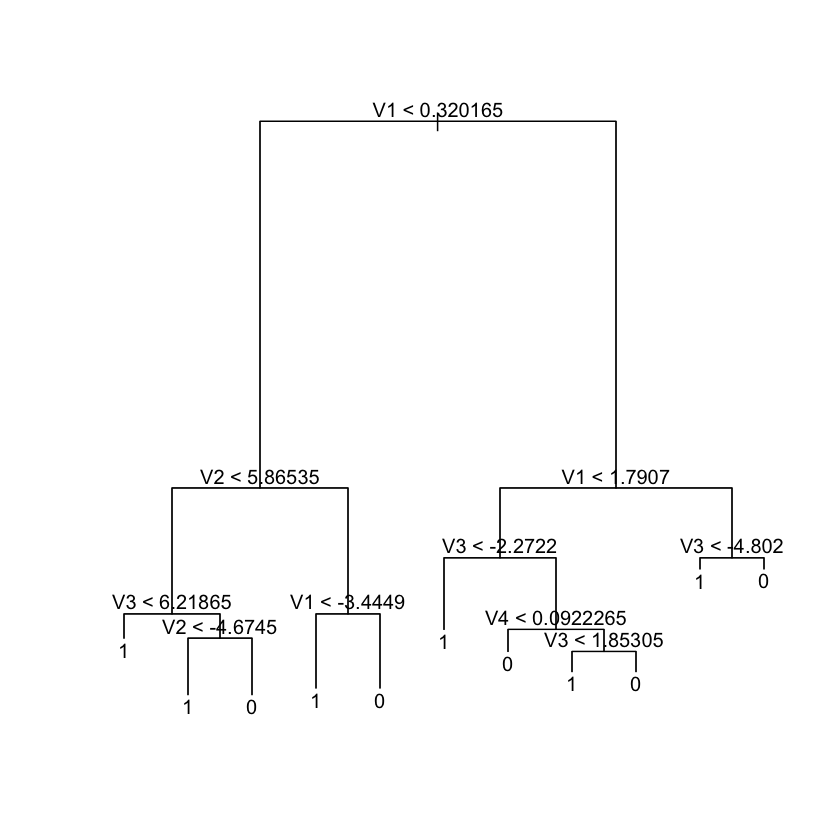

In [20]:
library(tree)
set.seed(1)

tree_model = tree(V5 ~ ., my_data)

plot(tree_model)
text(tree_model, pretty=0)

In [21]:
tree_model_cv = cv.tree(tree_model, FUN=prune.misclass)
tree_model_cv

$size
[1] 11 10  8  6  4  3  2  1

$dev
[1]  31  29  43  67 120 158 182 610

$k
[1]  -Inf   1.0   7.0  11.5  25.5  38.0  58.0 409.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

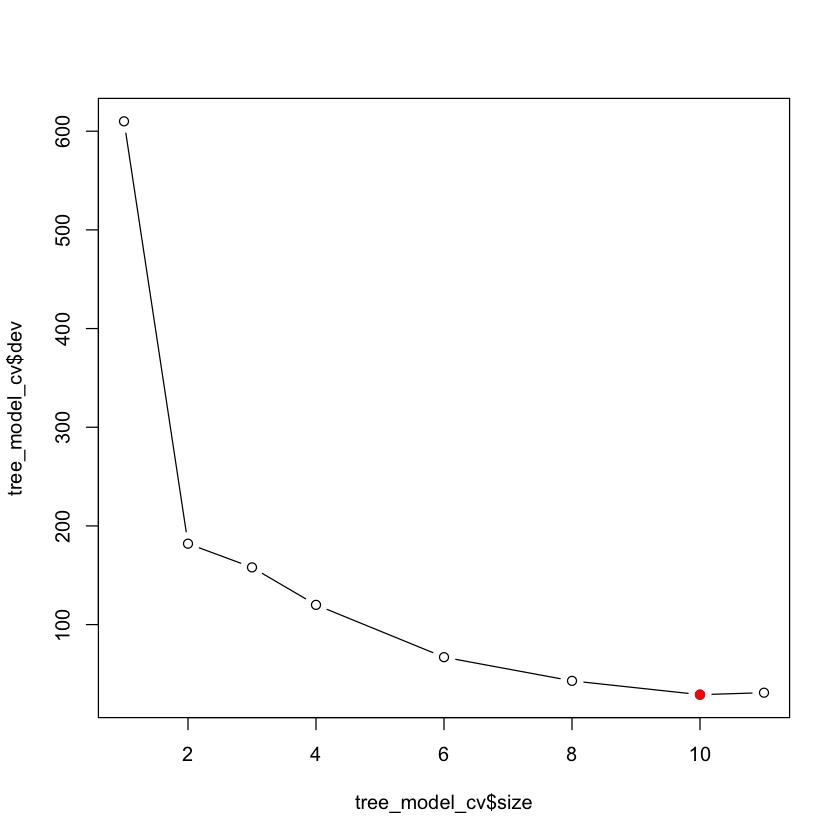

In [22]:
plot(tree_model_cv$size, tree_model_cv$dev, type='b')
points(tree_model_cv$size[which.min(tree_model_cv$dev)], min(tree_model_cv$dev), col = "red", pch = 19)

In [23]:
# Extract cross-validation error and optimal tree size
print(paste('Minimum CV Error is :', min(tree_model_cv$dev), 'Occured for the tree size of', 
tree_model_cv$size[which.min(tree_model_cv$dev)]))

[1] "Minimum CV Error is : 29 Occured for the tree size of 10"


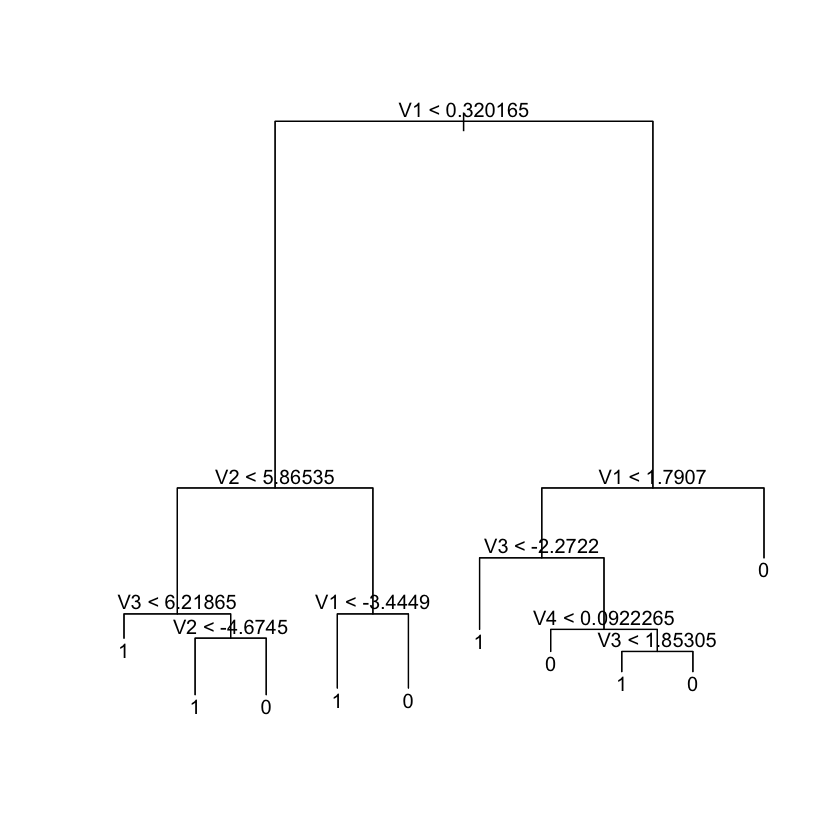

In [24]:
pruned_tree = prune.tree(tree_model, best = tree_model_cv$size[which.min(tree_model_cv$dev)]) 

plot(pruned_tree)
text(pruned_tree, pretty = 0)

### Random Forest

In [25]:
library(randomForest)
library(rfUtilities)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [26]:
predictors = dim(my_data)[2] - 1
trees_count = c(10, 20, 40, 80, 100, 200, 400, 800, 1000)

In [27]:
cv_accuracy = c()
set.seed(1)
for (rf_tree_count in trees_count){

    # Fitting random forest model
    rf_model = randomForest(V5 ~ ., data = my_data, m_try = sqrt(predictors), ntree = rf_tree_count)

    # Perform Cross Validation
    cv_results = rf.crossValidation(rf_model, my_data, n=5)

    cv_accuracy = c(cv_accuracy, mean(apply(cv_results$cross.validation$cv.producers.accuracy, 1, mean)))
}

running: classification cross-validation with 5 iterations 
running: classification cross-validation with 5 iterations 
running: classification cross-validation with 5 iterations 
running: classification cross-validation with 5 iterations 
running: classification cross-validation with 5 iterations 
running: classification cross-validation with 5 iterations 
running: classification cross-validation with 5 iterations 
running: classification cross-validation with 5 iterations 
running: classification cross-validation with 5 iterations 


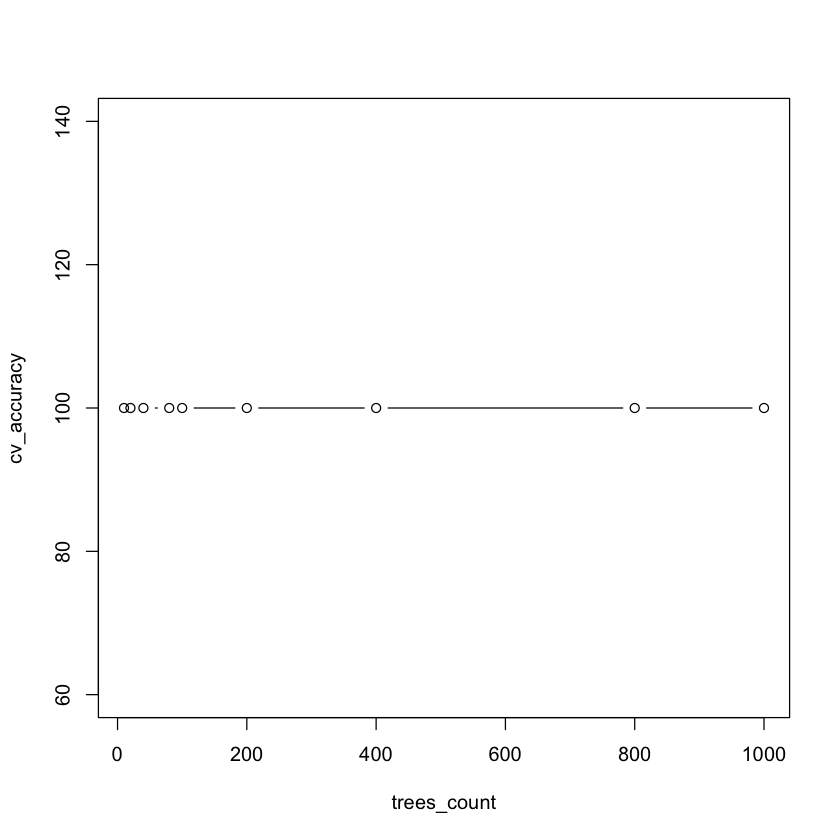

In [28]:
plot(trees_count, cv_accuracy, type = "b")

In [29]:
paste("Minimum CV error:", max(cv_accuracy), "at number of trees", which.max(cv_accuracy))

[1] "Minimum CV error: 100 at number of trees 1"

In [30]:
set.seed(1)
best_rf_model = randomForest(V5 ~ ., data = my_data, m_try = sqrt(predictors), ntree = which.max(cv_accuracy))

In [31]:
best_rf_model


Call:
 randomForest(formula = V5 ~ ., data = my_data, m_try = sqrt(predictors),      ntree = which.max(cv_accuracy)) 
               Type of random forest: classification
                     Number of trees: 1
No. of variables tried at each split: 2

        OOB estimate of  error rate: 1.17%
Confusion matrix:
    0   1 class.error
0 269   4 0.014652015
1   2 236 0.008403361

### Support Vector Machines

In [34]:
library(e1071)

svm_fit <- svm(V5 ~ ., data = my_data, kernel = "radial", gamma = 1, cost = 1e5)
summary(svm_fit)


Call:
svm(formula = V5 ~ ., data = my_data, kernel = "radial", gamma = 1, 
    cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1e+05 

Number of Support Vectors:  79

 ( 39 40 )


Number of Classes:  2 

Levels: 
 0 1




In [37]:
tune.out <- tune(svm, V5 ~ ., data = my_data, kernel = "radial",ranges = list(cost = c(0.1, 1, 10, 100, 1000),gamma = c(0.5, 1, 2, 3, 4)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0 

- Detailed performance results:
    cost gamma       error  dispersion
1  1e-01   0.5 0.005834127 0.009609057
2  1e+00   0.5 0.000000000 0.000000000
3  1e+01   0.5 0.000000000 0.000000000
4  1e+02   0.5 0.000000000 0.000000000
5  1e+03   0.5 0.000000000 0.000000000
6  1e-01   1.0 0.004374273 0.006152519
7  1e+00   1.0 0.000729927 0.002308232
8  1e+01   1.0 0.000729927 0.002308232
9  1e+02   1.0 0.000729927 0.002308232
10 1e+03   1.0 0.000729927 0.002308232
11 1e-01   2.0 0.003649635 0.006203187
12 1e+00   2.0 0.000729927 0.002308232
13 1e+01   2.0 0.000729927 0.002308232
14 1e+02   2.0 0.000729927 0.002308232
15 1e+03   2.0 0.000729927 0.002308232
16 1e-01   3.0 0.000000000 0.000000000
17 1e+00   3.0 0.000000000 0.000000000
18 1e+01   3.0 0.000000000 0.000000000
19 1e+02   3.0 0.000000000 0.000000000
20 1e+03   3.0 0.000000000 0.000000000
21 1e-

In [49]:
print(which.min(tune.out$performances[,"error"]))

[1] 2


In [65]:
# Train the SVM model using cross-validation
svm_model <- svm(V5 ~ ., data = my_data, 
                 kernel = 'radial', cost = tune.out$performances['cost'][which.min(tune.out$performances[,"error"]), ], 
                 gamma = tune.out$performances['gamma'][which.min(tune.out$performances[,"error"]), ], 
                 type = "C-classification", cross = "10")

In [70]:
print(paste("Cross Validated Accuracy:",svm_model$tot.accuracy))
print(paste("Cross Validated Error:",100-svm_model$tot.accuracy))

[1] "Cross Validated Accuracy: 100"
[1] "Cross Validated Error: 0"
